In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


11490434/11490434 [==============================] - 0s 0us/step


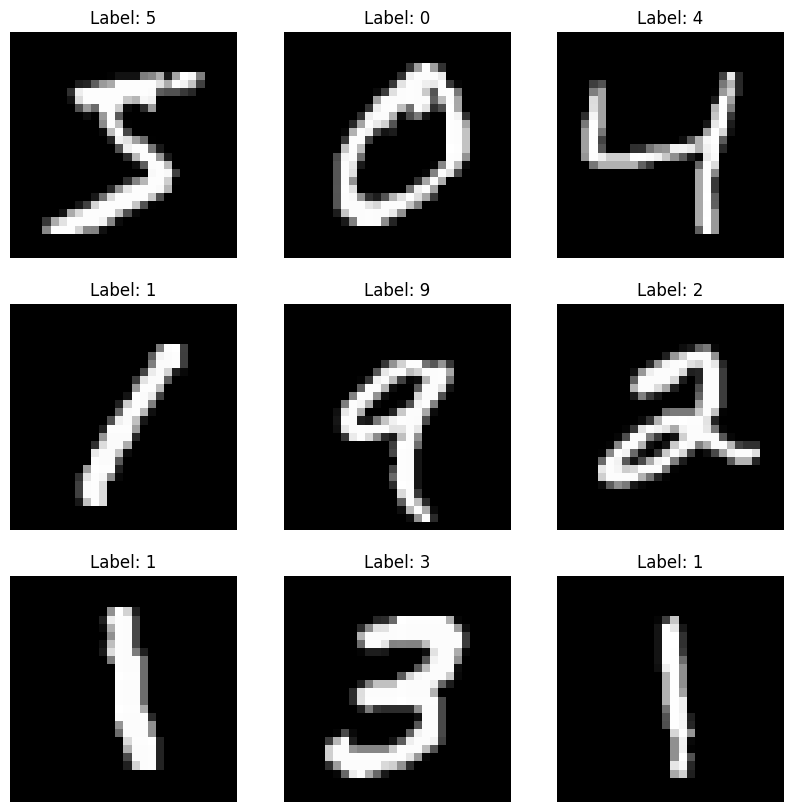

In [3]:
# Visualize the first few images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()


In [4]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1523 - accuracy: 0.9544 - val_loss: 0.0630 - val_accuracy: 0.9789
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0514 - accuracy: 0.9842 - val_loss: 0.0482 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0399 - val_accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.0480 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0395 - val_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0409 - val_accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0526 -

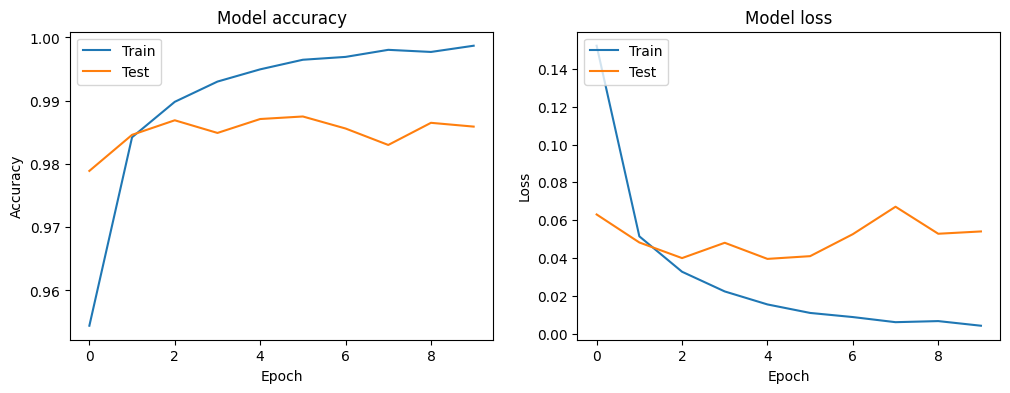

313/313 [==============================] - 3s 9ms/step - loss: 0.0540 - accuracy: 0.9859
Accuracy: 98.59%


In [6]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


313/313 [==============================] - 4s 10ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



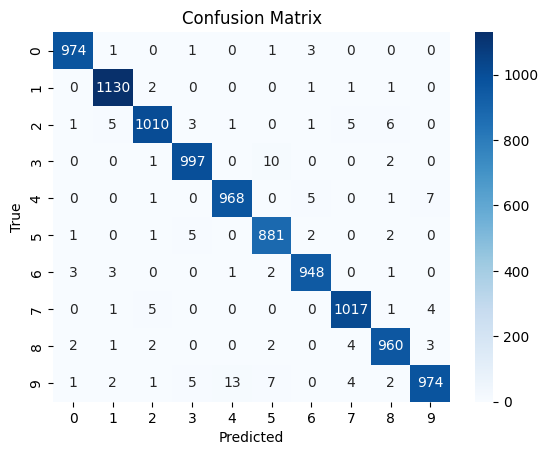

In [7]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
